# FFT test

The goal of this project is to determine the phase shift of a sinusoid signal, after the signal has been delayed and subjected to noise.

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import *
from matplotlib import rcParams
rcParams['font.family'] = 'serif'

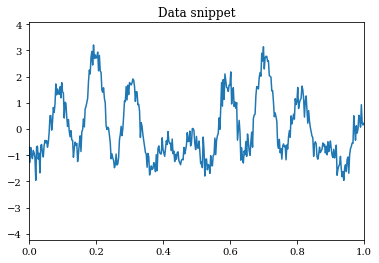

In [10]:
sampleFreq = 400
Tmax = 100.0

N = int(Tmax*sampleFreq)
T = np.array([float(i)/sampleFreq for i in range(N)])


dataFreqs = [(10,0.0), (2.0,.7), (7.77777777777,.323)]
#dataFreqs = [7.77777777777]

y = sum(np.cos((T-shift)*2.0*np.pi * freq) for freq,shift in dataFreqs)

noise = np.random.normal(size=y.shape)
y+= 0.3*noise

plt.title("Data snippet")
plt.xlim(0,1)
plt.plot(T,y)
plt.show()

[(2.0, -103.34947845961823), (7.7700000000000005, -0.015677914519926617), (7.78, 0.0), (10.0, 11.015218719248196)]


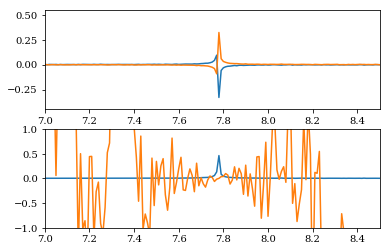

In [11]:

yFFT = fft(y)/N
freqs = fftfreq(N,1.0/sampleFreq)
yFFT = yFFT[:N//2]
freqs = freqs[:N//2]

modulus = np.abs(yFFT)
angle = (np.arctan2(yFFT.real,yFFT.imag))
angle = np.unwrap(angle*2)

angle -= angle[np.argmin(np.abs(freqs - 7.777))]
#angle *= modulus > .1

print([(freqs[i],angle[i]) for i, in np.argwhere(modulus > .1)])

plt.subplot(2,1,1)
plt.xlim(7,8.5)
plt.plot(freqs,yFFT.real,freqs,yFFT.imag)
plt.subplot(2,1,2)
plt.xlim(7,8.5)
plt.ylim(-1,1)
plt.plot(freqs,modulus,freqs,angle)
#plt.plot(T,y)

# sd
